In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
%matplotlib inline

In [45]:
data = pd.read_csv("../airOT201201.csv")

In [46]:
data.head()

,YEAR,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,FL_DATE,UNIQUE_CARRIER,TAIL_NUM,FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN,...,ACTUAL_ELAPSED_TIME,AIR_TIME,FLIGHTS,DISTANCE,DISTANCE_GROUP,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY
0,2012,1,1,7,2012-01-01,AA,N325AA,1,12478,JFK,...,347.0,330.0,1.0,2475.0,10,NaN,NaN,NaN,NaN,NaN
1,2012,1,2,1,2012-01-02,AA,N319AA,1,12478,JFK,...,349.0,325.0,1.0,2475.0,10,NaN,NaN,NaN,NaN,NaN
2,2012,1,3,2,2012-01-03,AA,N323AA,1,12478,JFK,...,353.0,319.0,1.0,2475.0,10,NaN,NaN,NaN,NaN,NaN
3,2012,1,4,3,2012-01-04,AA,N320AA,1,12478,JFK,...,347.0,309.0,1.0,2475.0,10,NaN,NaN,NaN,NaN,NaN
4,2012,1,5,4,2012-01-05,AA,N338AA,1,12478,JFK,...,344.0,306.0,1.0,2475.0,10,NaN,NaN,NaN,NaN,NaN


In [8]:
#data['FL_DATE'].value_counts()

In [7]:
data.dtypes

YEAR                     int64
MONTH                    int64
DAY_OF_MONTH             int64
DAY_OF_WEEK              int64
FL_DATE                 object
UNIQUE_CARRIER          object
TAIL_NUM                object
FL_NUM                   int64
ORIGIN_AIRPORT_ID        int64
ORIGIN                  object
ORIGIN_STATE_ABR        object
DEST_AIRPORT_ID          int64
DEST                    object
DEST_STATE_ABR          object
CRS_DEP_TIME             int64
DEP_TIME               float64
DEP_DELAY              float64
DEP_DELAY_NEW          float64
DEP_DEL15              float64
DEP_DELAY_GROUP        float64
TAXI_OUT               float64
WHEELS_OFF             float64
WHEELS_ON              float64
TAXI_IN                float64
CRS_ARR_TIME             int64
ARR_TIME               float64
ARR_DELAY              float64
ARR_DELAY_NEW          float64
ARR_DEL15              float64
ARR_DELAY_GROUP        float64
CANCELLED              float64
CANCELLATION_CODE       object
DIVERTED

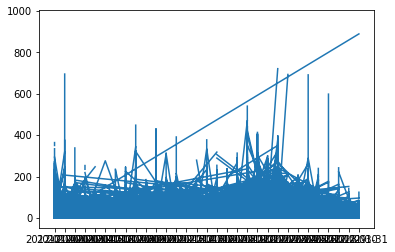

In [12]:
plt.plot(data['FL_DATE'], data['LATE_AIRCRAFT_DELAY'])

In [19]:
by_date = data.groupby('FL_DATE').count().reset_index()

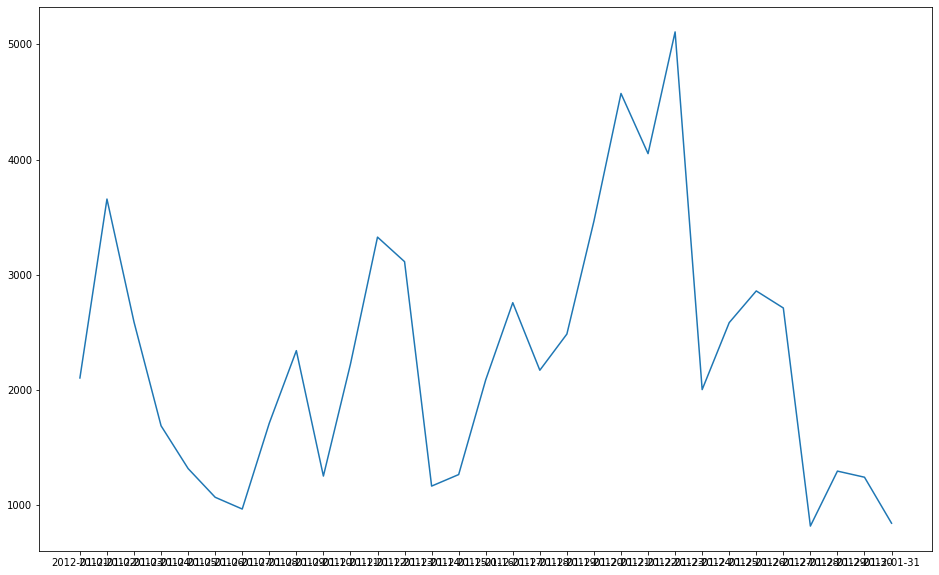

In [22]:
plt.figure(figsize=(16,10))
plt.plot(by_date['FL_DATE'], by_date['LATE_AIRCRAFT_DELAY'])

In [25]:
len(by_date)

31

In [47]:
#dataset from https://github.com/plotly/datasets/blob/master/2011_february_us_airport_traffic.csv
coordinates = pd.read_csv('../2011_february_us_airport_traffic.csv')

In [29]:
coordinates.head()

,iata,airport,city,state,country,lat,long,cnt
0,ORD,Chicago O'Hare International,Chicago,IL,USA,41.979595,-87.904464,25129
1,ATL,William B Hartsfield-Atlanta Intl,Atlanta,GA,USA,33.640444,-84.426944,21925
2,DFW,Dallas-Fort Worth International,Dallas-Fort Worth,TX,USA,32.895951,-97.037200,20662
3,PHX,Phoenix Sky Harbor International,Phoenix,AZ,USA,33.434167,-112.008056,17290
4,DEN,Denver Intl,Denver,CO,USA,39.858408,-104.667002,13781


In [52]:
data2 = data[['FL_DATE', 'DEST', 'LATE_AIRCRAFT_DELAY']]
data2.head()

,FL_DATE,DEST,LATE_AIRCRAFT_DELAY
0,2012-01-01,LAX,NaN
1,2012-01-02,LAX,NaN
2,2012-01-03,LAX,NaN
3,2012-01-04,LAX,NaN
4,2012-01-05,LAX,NaN


In [56]:
data3 = data2.groupby('DEST').count().reset_index()

In [59]:
combine = pd.merge(data3, coordinates, left_on='DEST', right_on='iata')

In [67]:
import plotly.graph_objects as go

fig = go.Figure(data=go.Scattergeo(
        lon = combine['long'],
        lat = combine['lat'],
        text = combine['airport'] + ". Total delay time: " + combine['LATE_AIRCRAFT_DELAY'].astype('str'),
        mode = 'markers',
        marker_color = combine['cnt'],
        ))

fig.update_layout(
        title = 'Total delay time in 2012 January<br>(Hover for airport names)',
        geo_scope='usa',
    )
fig.show()